In [38]:
# first of all we have to import all of those functions from the function file
%run functions_for_ESR_data_processing.ipynb

def linear_background (x, c, d):
    return c*x+d


def Lorentzian (x, x0, A, gamma):
    return A * gamma / ( (x-x0)**2 + gamma**2 )


def DLorentzian (x, x0, A, gamma):
    return -2 * A * gamma * (x-x0) / ( (x-x0)**2 + gamma**2 )**2

def DLorentzian_w_quadr_background (x, x0, A, gamma, l, m, n):
    return DLorentzian(x, x0, A, gamma) + l*x**2 + m*x + n


def two_DLorentzian (x, x01, A1, gamma1, x02, A2, gamma2):
    return DLorentzian(x, x01, A1, gamma1) + DLorentzian(x, x02, A2, gamma2)

def two_DLorentzian_w_quadr_background (x, x01, A1, gamma1, x02, A2, gamma2, l, m, n):
    return two_DLorentzian(x, x01, A1, gamma1, x02, A2, gamma2) + l*x**2 + m*x + n


def three_DLorentzian (x, x01, A1, gamma1, x02, A2, gamma2, x03, A3, gamma3):
    return DLorentzian(x, x01, A1, gamma1) + DLorentzian(x, x02, A2, gamma2) + DLorentzian(x, x03, A3, gamma3)

def three_DLorentzian_w_lin_background (x, x01, A1, gamma1, x02, A2, gamma2, x03, A3, gamma3, c, d):
    return three_DLorentzian(x, x01, A1, gamma1, x02, A2, gamma2, x03, A3, gamma3) + linear_background(x, c, d)

def three_DLorentzian_w_quadr_background (x, x01, A1, gamma1, x02, A2, gamma2, x03, A3, gamma3, c, d, e):
    return three_DLorentzian (x, x01, A1, gamma1, x02, A2, gamma2, x03, A3, gamma3) + c*x**2 + d*x + e


def four_DLorentzian (x, x01, A1, gamma1, x02, A2, gamma2, x03, A3, gamma3, x04, A4, gamma4):
    a = (DLorentzian(x, x01, A1, gamma1) + DLorentzian(x, x02, A2, gamma2) + DLorentzian(x, x03, A3, gamma3) + 
         DLorentzian(x, x04, A4, gamma4))
    return a

def four_DLorentzian_w_lin_background (x, x01, A1, gamma1, x02, A2, gamma2, x03, A3, gamma3, x04, A4, gamma4, c, d):
    return four_DLorentzian(x, x01, A1, gamma1, x02, A2, gamma2, x03, A3, gamma3, x04, A4, gamma4) + linear_background(x, c, d)


def DLorentzian_fit (data, field, initial_guess, bounds):
    parameters, pcov = curve_fit(DLorentzian_w_lin_background, field, data, initial_guess, bounds = bounds)
    x0 = parameters[0]
    A = parameters[1]
    gamma = parameters[2]
    fit = DLorentzian_w_lin_background (field, x0, A, gamma, parameters[3], parameters[4], parameters[5])
    return fit, [x0, pcov[0,0]], [A, pcov[1,1]], [gamma, pcov[2,2]]

def two_DLorentzian_fit (data, field):
    parameters, pcov = curve_fit(two_DLorentzian_w_lin_background, field, data)
    
    x01 = parameters[0]
    A1 = parameters[1]
    gamma1 = parameters[2]
    x02 = parameters[3]
    A2 = parameters[4]
    gamma2 = parameters[5]
    
    fit = two_DLorentzian_w_lin_background (field, x01, A1, gamma1, x02, A2, gamma2, parameters[6], parameters[7] )
    return fit

def Chi_squared (data, fit):
    diff = sum( [(data[i]-fit[i])**2 for i in np.arange(len(data)) ] )
    return diff/len(data)

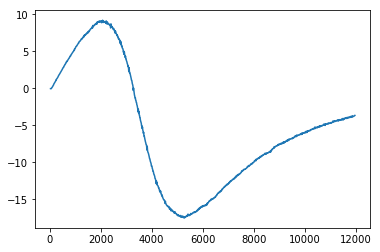

In [74]:
# here you have to give the filepath of the file you want to import
folder = "C:\\Users\\j111\\Dropbox\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\X-band\\"
name = "21_02_2019\\LiCuFeVO3_6p6K_processed.txt"

filename = folder + name

# import the file
field, amp = data_import(filename, 3)

# plot the amplitude and phase versus the magnetic field
plt.plot(field, amp)
#plt.plot(field, DLorentzian_w_lin_background(field, 3500, 190000000, 2300, 1e-4, -5))

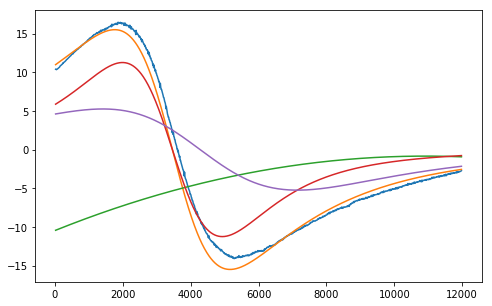

In [75]:
B01_guess = 3535.4827840372659
A1_guess = 131108994.16416022
gamma1_guess = 2564.8961959943645

B02_guess = 3777.8655905300516
A2_guess = 595680213.80748475
gamma2_guess = 7555.938765928774

l_guess = -1.4730198489476585e-07
m_guess = 0.0030582844999169018
n_guess = -13.416120442347621


#initial_guess = [3417, 9260089, 770, 3500, 9260, 1000, 5.3e-10, 2.5e-5, -0.43]
initial_guess = [B01_guess, A1_guess, gamma1_guess, B02_guess, A2_guess, gamma2_guess, l_guess, m_guess, n_guess]
popt, pcov = curve_fit (two_DLorentzian_w_quadr_background, field, amp, initial_guess, maxfev=200000, ftol=2.220446049250313e-16 )

B01 = popt[0]
A1 = popt[1]
gamma1 = popt[2]

B02 = popt[3]
A2 = popt[4]
gamma2 = popt[5]

l = popt[6]
m = popt[7]
n = popt[8]

fix, ax = plt.subplots(figsize=(8,5))
ax.plot(field, amp-(l*field*field+m*field+n))

ax.plot(field, two_DLorentzian (field, B01, A1, gamma1, B01, A2, gamma2))
ax.plot(field, l*field*field+m*field+n)

ax.plot(field, DLorentzian(field, B01, A1, gamma1))
ax.plot(field, DLorentzian(field, B02, A2, gamma2))

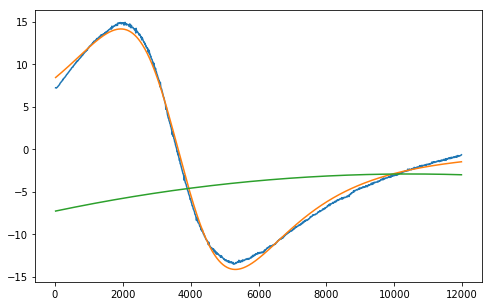

In [76]:
initial_guess = [3417, 9260089, 770, 5.3e-10, 2.5e-5, -0.43]
popt, pcov = curve_fit (DLorentzian_w_quadr_background, field, amp, initial_guess, maxfev=20000, ftol=2.220446049250313e-16 )

B01 = popt[0]
A1 = popt[1]
g1 = popt[2]

l = popt[3]
m = popt[4]
n = popt[5]

fix, ax = plt.subplots(figsize=(8,5))
ax.plot(field, amp-(l*field*field+m*field+n))

ax.plot(field, DLorentzian (field, B01, A1, g1))
ax.plot(field, l*field*field+m*field+n)

In [22]:
#  x0, A, gamma
initial_guess = [3417, 9260089, 770, 5.3e-10, 2.5e-5, -0.43]
lower_bounds = [3300, 0, 0, 3300, 0, 0, 3200, 0, 0, -np.inf, -np.inf, -np.inf]
upper_bounds = [3700, np.inf, 3000, 3700, np.inf, 3000, 3600, np.inf, 3000, np.inf, np.inf, np.inf]
bounds = (lower_bounds, upper_bounds)
popt, pcov = curve_fit (DLorentzian_w_quadr_background, field, amp
                       , initial_guess, maxfev=20000, ftol=2.220446049250313e-16 ) #, bounds = bounds)

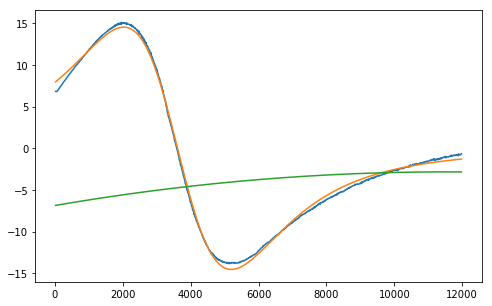

In [23]:
B01 = popt[0]
A1 = popt[1]
g1 = popt[2]
#B02 = popt[3]
#A2 = popt[4]
#g2 = popt[5]
#B03 = popt[6]
#A3 = popt[7]
#g3 = popt[8]

c = popt[3]
d = popt[4]
e = popt[5]

fix, ax = plt.subplots(figsize=(8,5))
ax.plot(field, amp-(c*field*field+d*field+e))
#ax.plot(field, three_DLorentzian(field, B01, A1, g1, B02, A2, g2, B03, A3, g3) )
ax.plot(field, DLorentzian (field, B01, A1, g1))
#ax.plot(field, DLorentzian (field, B02, A2, g2))
#ax.plot(field, DLorentzian (field, B03, A3, g3))
ax.plot(field, c*field*field+d*field+e)